# Project : Walmart TripType Classification


<img src="walmart_competition.jpg">

# 1. Data Introduce
### 1.1 Purpose : Use market basket analysis to classify shopping trips
    

### 1.2 Data set:
   > - Train Data : 647054 rows, 7 columns

   > - Test Data  : 653646 rows, 6 columns
   
   > - Submission Data  : 95674 rows, 39 columns
      
   > - [Source Link : Walmart TripType : Recruiting-trip-type-classification](https://www.kaggle.com/c/walmart-recruiting-trip-type-classification)

### 1.3 Evaluation
   > - multi-class logarithmic loss
   > $$-\frac{1}{N}\sum_{i=1}^N\sum_{j=1}^My_{ij}\log(p_{ij})$$


### 1.4 Results
#### (1) Train-test outcome
   > - Logarithmic loss : 
   > - Accuracy score : 
#### (2) Kaggle submission
   > - Total Teams : 
   > - Final Score : 
   > - Leaderboard :  
   

### 1.5 Contents
#### (1) Data Format
   > - Column Description
   > - Visualization
#### (2) Feature Engineering
   > - Columns what we made
#### (3) Modeling
   > - The model we tried
   > - The model we ultimately used
#### (4) Feedback 
   > - Question

# Data Format

In [1]:
import numpy as np
import pandas as pd
from IPython.display import Markdown

# Import the functions used in this project
import awesome_functions as af
import decode_utils as du
from feature_engineering import *  

# Pretty display for notebooks
%matplotlib inline

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

import lightgbm
from scipy.sparse import csr_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 원본을 유지하기 위해서 카피
df_train = pd.read_csv("../asset/train.csv")
df_test = pd.read_csv("../asset/test.csv")
df_submission = pd.read_csv("../asset/sample_submission.csv")

%time df_train_dd = pd.read_csv("Feature_matrix/df_train_dd_201807291831.csv")
%time df_train_fl = pd.read_csv("Feature_matrix/df_train_fl_201807291845.csv")
%time df_train_cp = pd.read_csv("Feature_matrix/df_train_cp_201808062200.csv")
%time df_test_dd = pd.read_csv("Feature_matrix/df_test_dd_201807291855.csv")
%time df_test_fl = pd.read_csv("Feature_matrix/df_test_fl_201807291908.csv")

CPU times: user 800 ms, sys: 76.3 ms, total: 877 ms
Wall time: 887 ms
CPU times: user 1min 31s, sys: 7.47 s, total: 1min 39s
Wall time: 1min 39s
CPU times: user 1min 41s, sys: 8.59 s, total: 1min 49s
Wall time: 1min 50s
CPU times: user 711 ms, sys: 59.3 ms, total: 770 ms
Wall time: 773 ms
CPU times: user 1min 33s, sys: 7.69 s, total: 1min 40s
Wall time: 1min 41s


In [3]:
# train = pd.read_csv('new_Exploration/train.csv')
# test = pd.read_csv('new_Exploration/test.csv')
# submission = pd.read_csv('new_Exploration/sample_submission.csv')

In [4]:
display(Markdown('## Train DataFrame'))
display(train.tail())
display(Markdown('## Test DataFrame'))
display(test.tail())

## Train DataFrame

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
647049,39,191346,Sunday,3.239000e+10,1,PHARMACY OTC,1118.0
647050,39,191346,Sunday,7.874205e+09,1,FROZEN FOODS,1752.0
647051,39,191346,Sunday,4.072000e+03,1,PRODUCE,4170.0
647052,8,191347,Sunday,4.190008e+09,1,DAIRY,1512.0
647053,8,191347,Sunday,3.800060e+09,1,GROCERY DRY GOODS,3600.0


## Test DataFrame

,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
653641,191348,Sunday,6.657211e+10,1,BATH AND SHOWER,1505.0
653642,191348,Sunday,8.818139e+10,1,BATH AND SHOWER,1099.0
653643,191348,Sunday,4.282557e+09,1,MENS WEAR,8220.0
653644,191348,Sunday,8.046919e+10,1,SWIMWEAR/OUTERWEAR,114.0
653645,191348,Sunday,7.871536e+09,1,MENS WEAR,4923.0


## Brief Column Description
   > - TripType :  구매자의 구매 활동을 대표하는 카테고리성 아이디, 라벨값을 의미한다.
   
   > - VisitNumber : 단일 구매자의 단일 구매 활동을 대표하는 아이디이다.
   
   > - Weekday :  구매활동을 한 요일을 의미한다.
   
   > - Upc : Universal Product Code 를 의미한다. 
   
   > - ScanCount : 해당 아이템을 몇 개를 샀는지에 대한 정보가 담겨져있다. 음수값은 반환을 의미한다.
   
   > - DepartmentDescription : 아이템 분류의 가장 높은 범주를 의미한다.
   
   > - FinelineNumber : 월마트에서 자체적으로 제공하는 더 세분화된 상품 분류 코드이다.

In [5]:
submission = pd.read_csv('new_Exploration/sample_submission.csv')
submission.tail()

,VisitNumber,TripType_3,TripType_4,TripType_5,TripType_6,TripType_7,TripType_8,TripType_9,TripType_12,TripType_14,...,TripType_36,TripType_37,TripType_38,TripType_39,TripType_40,TripType_41,TripType_42,TripType_43,TripType_44,TripType_999
95669,191338,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95670,191339,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95671,191340,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95672,191341,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95673,191348,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# EDA

## Distribution of goods by TripType

In [6]:
train.tail()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
647049,39,191346,Sunday,3.239000e+10,1,PHARMACY OTC,1118.0
647050,39,191346,Sunday,7.874205e+09,1,FROZEN FOODS,1752.0
647051,39,191346,Sunday,4.072000e+03,1,PRODUCE,4170.0
647052,8,191347,Sunday,4.190008e+09,1,DAIRY,1512.0
647053,8,191347,Sunday,3.800060e+09,1,GROCERY DRY GOODS,3600.0


In [7]:
train_40 = train[train['TripType']==40]
train_40_groupby = train_40.groupby('DepartmentDescription',as_index=False)['ScanCount'].count()
train_40_groupby = train_40_groupby.sort_values('ScanCount',ascending=False)
train_39 = train[train['TripType']==39]
train_39_groupby = train_39.groupby('DepartmentDescription',as_index=False)['ScanCount'].count()
train_39_groupby = train_39_groupby.sort_values('ScanCount',ascending=False)

Text(0.5,1,'Distribution of DD at TripType = 40')

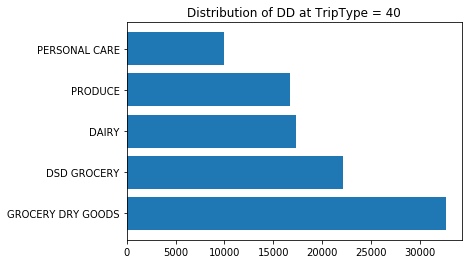

In [235]:
import matplotlib.pyplot as plt
plt.barh((train_40_groupby['DepartmentDescription'][:5]) , (train_40_groupby['ScanCount'][:5]))
plt.title('Distribution of DD at TripType = 40')

Text(0.5,1,'Distribution of DD at TripType = 39')

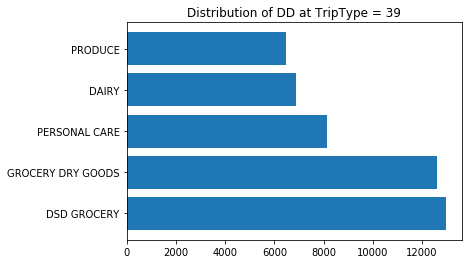

In [9]:
plt.barh((train_39_groupby['DepartmentDescription'][:5]) , (train_39_groupby['ScanCount'][:5]))
plt.title('Distribution of DD at TripType = 39')

#### 각각의 TripType은 각기 다른 DepartmentDescription 분포(특성) 를 띈다.

## TripType '999' indicating other items

In [10]:
train_tt_sc = train.groupby('TripType',as_index=False)['ScanCount'].sum()

/home/hskimim/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/hskimim/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


(-5000, 50000)

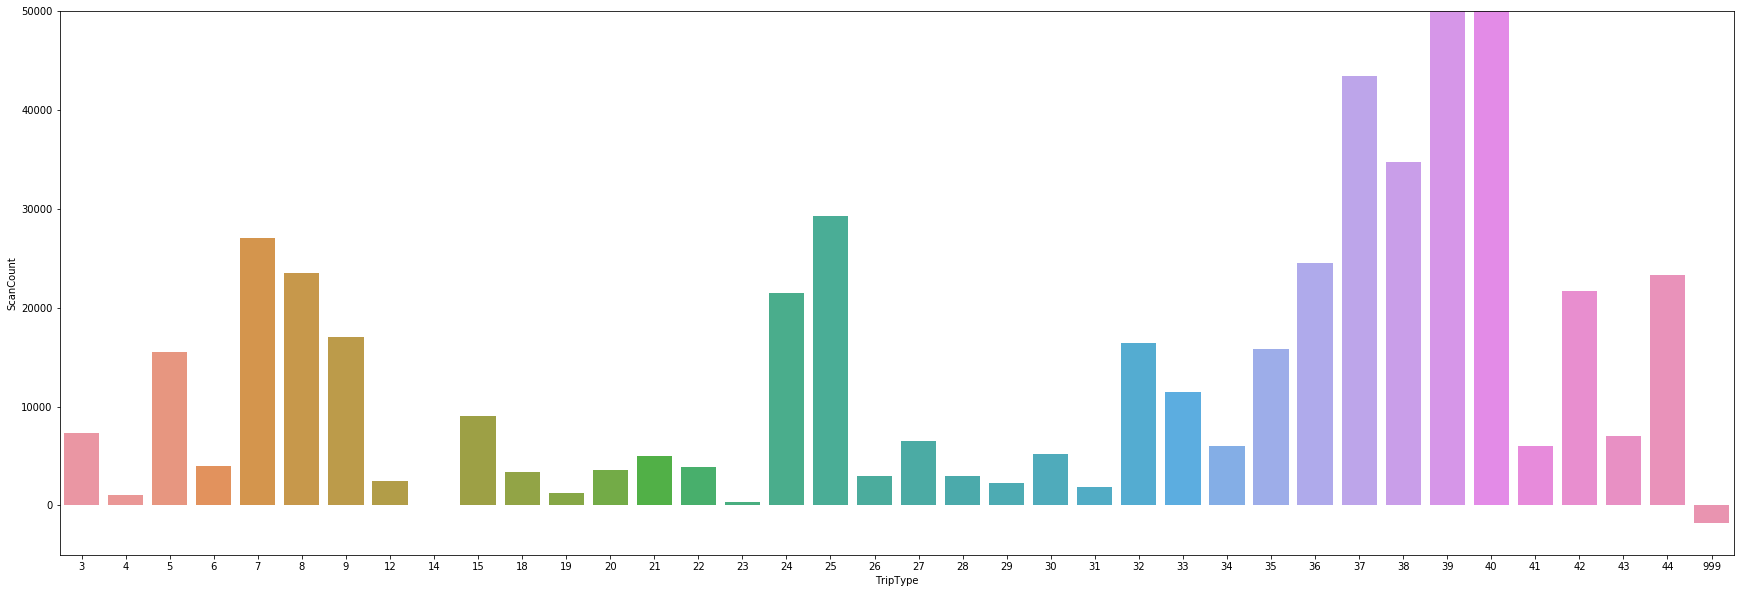

In [11]:
import seaborn as sns
plt.figure(figsize=(30,10))
sns.barplot(train_tt_sc['TripType'].astype('int') , train_tt_sc['ScanCount'])
plt.ylim(-5000,50000)

### TripType '999' 는 총 구매한 아이템의 수가 음수, 즉 최종 구매 활동이 `반환` 인 구매자를 의미한다.

## Deal with Missing value

In [16]:
train.isna().sum()

TripType                    0
VisitNumber                 0
Weekday                     0
Upc                      4129
ScanCount                   0
DepartmentDescription    1361
FinelineNumber           4129
dtype: int64

In [265]:
null_index = sorted(list(set(train[train['Upc'].isna()].index).intersection(set(train[train['FinelineNumber'].isna()].index))))
null_train_df = train.loc[null_index,:]#.reset_index(drop=True)

In [266]:
null_train_df['DepartmentDescription'].value_counts().reset_index()

,index,DepartmentDescription
0,PHARMACY RX,2768


In [267]:
null_train_df.iloc[:10,:]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
25,26,8,Friday,NaN,1,NaN,NaN
548,27,259,Friday,NaN,3,NaN,NaN
549,27,259,Friday,NaN,1,NaN,NaN
959,999,409,Friday,NaN,-1,NaN,NaN
1116,39,479,Friday,NaN,1,NaN,NaN
1134,999,484,Friday,NaN,-2,NaN,NaN
1135,999,484,Friday,NaN,-2,NaN,NaN
1155,44,496,Friday,NaN,1,PHARMACY RX,NaN
1216,5,521,Friday,NaN,1,PHARMACY RX,NaN
1373,5,585,Friday,NaN,1,PHARMACY RX,NaN


> - FinelineNumber와 Upc 컬럼이 결측치인 경우, DepartmentDescription 컬럼은 함께 결측치를 띄거나 `PHARMACY RX`이다.

### Imputation on FinelineNumber , Upc

In [268]:
null_train_df

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
25,26,8,Friday,NaN,1,NaN,NaN
548,27,259,Friday,NaN,3,NaN,NaN
549,27,259,Friday,NaN,1,NaN,NaN
959,999,409,Friday,NaN,-1,NaN,NaN
1116,39,479,Friday,NaN,1,NaN,NaN
1134,999,484,Friday,NaN,-2,NaN,NaN
1135,999,484,Friday,NaN,-2,NaN,NaN
1155,44,496,Friday,NaN,1,PHARMACY RX,NaN
1216,5,521,Friday,NaN,1,PHARMACY RX,NaN
1373,5,585,Friday,NaN,1,PHARMACY RX,NaN


In [278]:
ls1 = train[train['DepartmentDescription']=='PHARMACY RX'].index
ls2 = null_train_df[null_train_df['DepartmentDescription']=='PHARMACY RX'].index
ls3 = list(set(ls1).difference(set(ls2)))
most_freq_pharmacy_rx = train.loc[ls3,:]
most_feq_upc = most_freq_pharmacy_rx['Upc']
most_feq_fl = most_freq_pharmacy_rx['FinelineNumber']
most_feq_upc = most_feq_upc.value_counts().index[0]
most_feq_fl = most_feq_fl.value_counts().index[0]

In [285]:
most_feq_upc , most_feq_fl

(30169183702.0, 4822.0)

### DepartmentDescription 컬럼이  `PHARMACY RX` 이고, 나머지 아이템 컬럼이 결측치일 때, 위의 두 가지 코드로 채워준다.

### 세 가지 아이템 컬럼이 모두 결측치를 띄는 경우에는, 아래의 값으로 Imputation 한다.
> - DepartmentDescription: NULL 

> - FinelineNumber: 1.1 

> - Upc: -9999 respectively.

## Our initial hypothesis after EDA
> ### (1) The most important factor determining TripType is `which item the buyer bought.`
> ### (1) TripType 이 정해지는 데에 가장 중요한 요소는 `어떠한 아이템을 샀는가`이다.
> ### (2) 구매자들 즉, VisitNumber 마다 각기 구분되는 `구매 패턴`을 띄고 있다.
> ### (3)  즉, 고유한 VisitNumber가 가지고 있는 잘 나오는 `주사위 면`을 가지고 있고, 이에 따라 라벨이 정해진다.

# Feature Engineering
- 1) UPC decoding
- 2) Feature what we used

## UPC Decoding
- https://www.kaggle.com/c/walmart-recruiting-trip-type-classification/discussion/18158

<img src="upc_decoding.jpg">

- 만약 Upc가 결측치라면 -9999를 채워준다.
- There are some products in the dataset with a length of 4 or 5. It seemed that these are the in-house products (PRODUCE)
- 코드의 길이가 5 이하라면. 월마트 내부에서 자체적으로 생산하는 물품인 경우로 보여진다.(HOUSE)

In [234]:
print('Before Decoding: ',len(train['Upc'].unique()))
print('After Decoding: ',len(decodeStuffNeedsToBeDecoded(train)['Company'].unique()))

Before Decoding:  97715
After Decoding:  5687


## Feature What we MADE and USED
> - DepartmentDescription_dummies -- 68 length columns

> - FinelineNumber_dummies -- 5355 length columns

> - Company_dummies -- 5687 length columns

> - Item_dummies -- 10007 length columns

> - Weekday_dummies -- 7 length columns

> - Others -- 3 length columns
    - N_DD ()
    - N_FL ()
    - N_Company () 


### UPC, FinelineNumber, DepartmentDescription 결측치 처리 및 Decoding을 통해서 COMPANY, ITEM_NBR을 추가함.

In [2]:
df_decoded = du.decodeStuffNeedsToBeDecoded(df_train)

In [3]:
df_test_decoded = du.decodeStuffNeedsToBeDecoded(df_test)

### Item_nbr는 총 10007개의 unique값을 가지므로, df를 저장해서 불러오지않고, 직접 pivot을 실행했다.

In [4]:
%time df_train_item = get_pivor_df(df_decoded, "Item_nbr")
df_train_item = df_train_item.reset_index()

CPU times: user 1min 52s, sys: 1min 6s, total: 2min 58s
Wall time: 3min 4s


In [5]:
%time df_test_item = get_pivor_df(df_test_decoded, "Item_nbr")
df_test_item = df_test_item.reset_index()

CPU times: user 1min 51s, sys: 59.1 s, total: 2min 50s
Wall time: 2min 55s


In [6]:
%time df_test_cp = get_pivor_df(df_test_decoded, "Company")
df_test_cp = df_test_cp.reset_index()

CPU times: user 54.6 s, sys: 22.5 s, total: 1min 17s
Wall time: 1min 18s


### cp, fl, item 컬럼들을 전체 사용하지않고, 1개의 dd를 바라보는 아이템들만 list로 가져왔다.

In [7]:
sc_li, cp_li, fl_li, item_li = getRelevantListWeNeed(df_decoded)
len(cp_li), len(fl_li), len(item_li)

(4806, 2696, 9958)

In [8]:
sc_test_li, cp_test_li, fl_test_li, item_test_li = getRelevantListWeNeed(df_test_decoded)
len(cp_test_li), len(fl_test_li), len(item_test_li)

(4829, 2694, 9964)

### Visitnumber 당 구매한 카테고리 갯수를 컬럼별로 저장

In [9]:
num_dd = get_num_of_categories_per_users(df_decoded)
num_fl = get_num_of_categories_per_users(df_decoded, "FinelineNumber")
num_company = get_num_of_categories_per_users(df_decoded, "Company")
num_upc = get_num_of_categories_per_users(df_decoded, "Upc")
num_item = get_num_of_categories_per_users(df_decoded, "Item_nbr")
len(num_dd), len(num_fl), len(num_company), len(num_dd), len(num_dd)

(95674, 95674, 95674, 95674, 95674)

In [10]:
test_num_dd = get_num_of_categories_per_users(df_test_decoded)
test_num_fl = get_num_of_categories_per_users(df_test_decoded, "FinelineNumber")
test_num_company = get_num_of_categories_per_users(df_test_decoded, "Company")
test_num_upc = get_num_of_categories_per_users(df_test_decoded, "Upc")
test_num_item = get_num_of_categories_per_users(df_test_decoded, "Item_nbr")
len(test_num_dd), len(test_num_fl), len(test_num_company), len(test_num_dd), len(test_num_dd)

(95674, 95674, 95674, 95674, 95674)

In [11]:
df_train_fl.rename({"-1" : "1.1"}, axis=1, inplace=True)
df_test_fl.rename({"-1" : "1.1"}, axis=1, inplace=True)

In [12]:
%time dfs = [df_train_fl[fl_li], df_train_cp[cp_li], df_train_item[item_li]]

CPU times: user 16 s, sys: 29.7 s, total: 45.7 s
Wall time: 50.7 s


In [13]:
%time dfs_test = [df_test_fl[fl_test_li], df_test_cp[cp_test_li], df_test_item[item_test_li]]

CPU times: user 20.6 s, sys: 38.5 s, total: 59.1 s
Wall time: 1min 5s


### fl, cp는 median 값이상, item은 mean 값이상인 컬럼들만 남김

In [14]:
col_fl_filttered_li, col_cp_filttered_li, col_item_filttered_li = get_filttered_list_by_cols(dfs)

In [15]:
print(len(col_fl_filttered_li) + len(col_cp_filttered_li) + len(col_item_filttered_li))
len(col_cp_filttered_li), len(col_fl_filttered_li), len(col_item_filttered_li)

6333


(2360, 1360, 2613)

In [16]:
test_fl_filttered_li, test_cp_filttered_li, test_item_filttered_li = get_filttered_list_by_cols(dfs_test)

In [17]:
print(len(test_fl_filttered_li) + len(test_cp_filttered_li) + len(test_item_filttered_li))
len(test_cp_filttered_li), len(test_fl_filttered_li), len(test_item_filttered_li)

6325


(2331, 1367, 2627)

In [18]:
cp_cols = np.intersect1d(col_cp_filttered_li, test_cp_filttered_li)
fl_cols = np.intersect1d(col_fl_filttered_li, test_fl_filttered_li)
item_cols = np.intersect1d(col_item_filttered_li, test_item_filttered_li)

In [48]:
print(len(cp_cols), len(fl_cols), len(item_cols))
len(cp_cols) + len(fl_cols)

2105 1186 2359


3291

In [49]:
df_feature = pd.concat([df_train_dd, df_train_fl[fl_cols], df_train_cp[cp_cols]], axis = 1)
len(df_feature)

95674

In [50]:
# df_test_feature = pd.concat([df_test_dd, df_test_fl[fl_cols],\
#                    df_test_item[item_cols], df_test_cp[cp_cols]], axis = 1)
# len(df_test_feature)

In [51]:
df_test_feature = pd.concat([df_test_dd, df_test_fl[fl_cols], df_test_cp[cp_cols]], axis = 1)
len(df_test_feature)

95674

### DepartmentDescription의 MENSWEAR, MENS WEAR 컬럼은 의미가 같으므로 합쳐준다.

In [52]:
df_feature["MENSWEAR"] = df_feature["MENS WEAR"] + df_feature["MENSWEAR"]
df_feature.drop("MENS WEAR", axis = 1, inplace=True)

In [53]:
df_test_feature["MENSWEAR"] = df_test_feature["MENS WEAR"] + df_test_feature["MENSWEAR"]
df_test_feature.drop("MENS WEAR", axis = 1, inplace=True)

### 각 VisitNumber 당 Scan한 총합을 추가.

In [54]:
df_feature["Scancount_total"] = sc_li
df_test_feature["Scancount_total"] = sc_test_li

### 다른 정보들을 만든다.

In [55]:
df_feature["N_DD"] = num_dd
df_feature["N_FL"] = num_fl
df_feature["N_COMPANY"] = num_company
df_feature["N_ITEM"] = num_item

In [56]:
df_test_feature["N_DD"] = test_num_dd
df_test_feature["N_FL"] = test_num_fl
df_test_feature["N_COMPANY"] = test_num_company
df_test_feature["N_ITEM"] = test_num_item

In [57]:
df_upc = df_decoded.groupby(["VisitNumber", "Upc"]).sum()["ScanCount"].reset_index(name="Sc_sum")
upc_vn_li = df_upc.groupby("VisitNumber").sum()["Sc_sum"].index.unique()
df_feature.set_index("VisitNumber", inplace=True)
df_feature["N_UPC"] = 0
df_feature.at[upc_vn_li, "N_UPC"] = num_upc
df_feature = df_feature.reset_index()

In [58]:
df_upc = df_test_decoded.groupby(["VisitNumber", "Upc"]).sum()["ScanCount"].reset_index(name="Sc_sum")
upc_vn_li = df_upc.groupby("VisitNumber").sum()["Sc_sum"].index.unique()
df_test_feature.set_index("VisitNumber", inplace=True)
df_test_feature["N_UPC"] = 0
df_test_feature.at[upc_vn_li, "N_UPC"] = test_num_upc
df_test_feature = df_test_feature.reset_index()

In [59]:
row_count = df_decoded.groupby("VisitNumber").count()["Weekday"].values
df_feature["ROW_CNT"] = row_count

In [60]:
test_row_count = df_test_decoded.groupby("VisitNumber").count()["Weekday"].values
df_test_feature["ROW_CNT"] = test_row_count

In [61]:
df_feature["FL_DIV_DD"] = df_feature["N_FL"].div(df_feature["N_DD"], axis = 0)
df_feature["UPC_DIV_DD"] = df_feature["N_UPC"].div(df_feature["N_DD"], axis = 0)
df_feature["COMPANY_DIV_DD"] = df_feature["N_COMPANY"].div(df_feature["N_DD"], axis = 0)

In [62]:
df_test_feature["FL_DIV_DD"] = df_test_feature["N_FL"].div(df_test_feature["N_DD"], axis = 0)
df_test_feature["UPC_DIV_DD"] = df_test_feature["N_UPC"].div(df_test_feature["N_DD"], axis = 0)
df_test_feature["COMPANY_DIV_DD"] = df_test_feature["N_COMPANY"].div(df_test_feature["N_DD"], axis = 0)

In [63]:
df_feature = df_feature.fillna(0)
df_test_feature = df_test_feature.fillna(0)

In [113]:
df_feature[["N_DD", "N_UPC", "N_FL", "N_ITEM", "ROW_CNT", "Scancount_total"]].describe()

,N_DD,N_UPC,N_FL,N_ITEM,ROW_CNT,Scancount_total
count,95674.000000,95674.000000,95674.000000,95674.000000,95674.000000,95674.000000
mean,3.298043,6.424818,5.824372,6.394924,6.763112,7.499467
std,2.932498,8.378746,7.359822,8.220524,8.531894,10.261119
min,0.000000,0.000000,0.000000,0.000000,1.000000,-52.000000
25%,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000
50%,2.000000,3.000000,3.000000,3.000000,4.000000,4.000000
75%,5.000000,8.000000,7.000000,8.000000,8.000000,9.000000
max,26.000000,189.000000,112.000000,186.000000,209.000000,311.000000


In [68]:
df_test_feature[["N_DD", "N_UPC", "N_FL", "N_ITEM", "ROW_CNT", "Scancount_total"]].describe()

,N_DD,N_UPC,N_FL,N_ITEM,ROW_CNT,Scancount_total
count,95674.000000,95674.000000,95674.000000,95674.000000,95674.000000,95674.000000
mean,3.314046,6.490279,5.872139,6.459696,6.832013,7.574827
std,2.959413,8.506297,7.452454,8.347012,8.665022,10.540432
min,0.000000,0.000000,0.000000,0.000000,1.000000,-24.000000
25%,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000
50%,2.000000,3.000000,3.000000,3.000000,4.000000,4.000000
75%,5.000000,8.000000,7.000000,8.000000,8.000000,9.000000
max,24.000000,151.000000,120.000000,147.000000,154.000000,417.000000


In [31]:
cols_do_not_need = ['VisitNumber', 'Return', 'TripType', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
   'Friday', 'Saturday', 'Sunday', 'MENS WEAR']
cols_dd = [col for col in df_train_dd.columns if col not in cols_do_not_need]

In [64]:
%time df_feature = pd.DataFrame(np.where(df_feature == np.inf, 0, df_feature), columns=df_feature.columns)
%time df_feature = pd.DataFrame(np.where(df_feature == -np.inf, 0, df_feature), columns=df_feature.columns)

CPU times: user 3.53 s, sys: 3.6 s, total: 7.13 s
Wall time: 7.5 s
CPU times: user 1.57 s, sys: 1.39 s, total: 2.96 s
Wall time: 2.96 s


In [65]:
%time df_test_feature = pd.DataFrame(np.where(df_test_feature == np.inf, 0, df_test_feature), columns=df_test_feature.columns)
%time df_test_feature = pd.DataFrame(np.where(df_test_feature == -np.inf, 0, df_test_feature), columns=df_test_feature.columns)

CPU times: user 3.58 s, sys: 3.51 s, total: 7.1 s
Wall time: 7.51 s
CPU times: user 1.62 s, sys: 1.43 s, total: 3.05 s
Wall time: 3.05 s


# Final feature

In [66]:
df_feature.tail()

,VisitNumber,TripType,Return,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,...,Scancount_total,N_DD,N_FL,N_COMPANY,N_ITEM,N_UPC,ROW_CNT,FL_DIV_DD,UPC_DIV_DD,COMPANY_DIV_DD
95669,191343.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,3.0,5.0,6.0,7.0,7.0,7.0,1.666667,2.333333,2.000
95670,191344.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,5.0,2.0,3.0,4.0,5.0,5.0,5.0,1.500000,2.500000,2.000
95671,191345.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,17.0,8.0,12.0,11.0,13.0,13.0,13.0,1.500000,1.625000,1.375
95672,191346.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17.0,8.0,16.0,13.0,17.0,17.0,17.0,2.000000,2.125000,1.625
95673,191347.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.000000,1.000000,1.000


In [67]:
df_test_feature.tail()

,VisitNumber,Return,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,...,Scancount_total,N_DD,N_FL,N_COMPANY,N_ITEM,N_UPC,ROW_CNT,FL_DIV_DD,UPC_DIV_DD,COMPANY_DIV_DD
95669,191338.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,3.0,6.0,4.0,7.0,7.0,7.0,2.000000,2.333333,1.333333
95670,191339.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,6.0,3.0,5.0,5.0,5.0,5.0,5.0,1.666667,1.666667,1.666667
95671,191340.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000
95672,191341.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,5.0,10.0,9.0,10.0,10.0,10.0,2.000000,2.000000,1.800000
95673,191348.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,7.0,3.0,7.0,6.0,7.0,7.0,7.0,2.333333,2.333333,2.000000


# Modeling

In [38]:
from sklearn.externals import joblib

In [39]:
def saveModelObjectAsPickle(model, fileName):
    joblib.dump(model, fileName)

In [40]:
def run_light_gbm(df_feature):
    train_X , train_y = af.get_df_to_fit(df_feature)
    label_enc = LabelEncoder().fit(train_y)
    y_labeled = label_enc.transform(train_y)
    train_X, test_X, train_y, test_y = train_test_split(train_X, y_labeled, random_state=0)
    print("Splited train data in two")
    train_X = train_X.astype(float)
    test_X = test_X.astype(float)
    X_train = csr_matrix(train_X.values)
    X_test = csr_matrix(test_X.values)
    dtrain = lightgbm.Dataset(X_train, label=train_y)
    dtest = lightgbm.Dataset(X_test, label=test_y)
    print("Dataset has been made")
    num_boost_round = 4000
    learning_rate=0.02

    params = {'objective':'multiclass',
              'boosting_type': 'gbdt',
              'max_depth' : -1,
              'nthread': 4,
              'metric': 'multi_logloss',
              'num_class':38,
              'learning_rate':learning_rate,
              }

    lightgbm_model = lightgbm.train(params = params,
                                    train_set = dtrain, 
                                    valid_sets = [dtrain, dtest],
                                    num_boost_round = num_boost_round,
                                    early_stopping_rounds=10)
    
    return lightgbm_model

In [68]:
new_gbm_model = run_light_gbm(df_feature)

Splited train data in two
Dataset has been made
[1]	training's multi_logloss: 3.4331	valid_1's multi_logloss: 3.43853
Training until validation scores don't improve for 10 rounds.
[2]	training's multi_logloss: 3.27756	valid_1's multi_logloss: 3.28753
[3]	training's multi_logloss: 3.14942	valid_1's multi_logloss: 3.16246
[4]	training's multi_logloss: 3.04018	valid_1's multi_logloss: 3.05617
[5]	training's multi_logloss: 2.94413	valid_1's multi_logloss: 2.9627
[6]	training's multi_logloss: 2.85875	valid_1's multi_logloss: 2.8797
[7]	training's multi_logloss: 2.78128	valid_1's multi_logloss: 2.80422
[8]	training's multi_logloss: 2.71065	valid_1's multi_logloss: 2.73538
[9]	training's multi_logloss: 2.64556	valid_1's multi_logloss: 2.67211
[10]	training's multi_logloss: 2.5852	valid_1's multi_logloss: 2.61351
[11]	training's multi_logloss: 2.52907	valid_1's multi_logloss: 2.55875
[12]	training's multi_logloss: 2.47656	valid_1's multi_logloss: 2.50797
[13]	training's multi_logloss: 2.42723	

[114]	training's multi_logloss: 0.989312	valid_1's multi_logloss: 1.09354
[115]	training's multi_logloss: 0.98482	valid_1's multi_logloss: 1.08948
[116]	training's multi_logloss: 0.980346	valid_1's multi_logloss: 1.08545
[117]	training's multi_logloss: 0.975946	valid_1's multi_logloss: 1.08157
[118]	training's multi_logloss: 0.971634	valid_1's multi_logloss: 1.07772
[119]	training's multi_logloss: 0.967372	valid_1's multi_logloss: 1.07398
[120]	training's multi_logloss: 0.963146	valid_1's multi_logloss: 1.07022
[121]	training's multi_logloss: 0.958972	valid_1's multi_logloss: 1.06654
[122]	training's multi_logloss: 0.954943	valid_1's multi_logloss: 1.063
[123]	training's multi_logloss: 0.95093	valid_1's multi_logloss: 1.05953
[124]	training's multi_logloss: 0.946954	valid_1's multi_logloss: 1.05606
[125]	training's multi_logloss: 0.943065	valid_1's multi_logloss: 1.0527
[126]	training's multi_logloss: 0.939181	valid_1's multi_logloss: 1.04926
[127]	training's multi_logloss: 0.935391	va

[225]	training's multi_logloss: 0.710615	valid_1's multi_logloss: 0.866692
[226]	training's multi_logloss: 0.709216	valid_1's multi_logloss: 0.865707
[227]	training's multi_logloss: 0.707866	valid_1's multi_logloss: 0.864784
[228]	training's multi_logloss: 0.706533	valid_1's multi_logloss: 0.863863
[229]	training's multi_logloss: 0.705158	valid_1's multi_logloss: 0.862968
[230]	training's multi_logloss: 0.703826	valid_1's multi_logloss: 0.862029
[231]	training's multi_logloss: 0.702525	valid_1's multi_logloss: 0.861138
[232]	training's multi_logloss: 0.701228	valid_1's multi_logloss: 0.860257
[233]	training's multi_logloss: 0.699902	valid_1's multi_logloss: 0.859354
[234]	training's multi_logloss: 0.698619	valid_1's multi_logloss: 0.858488
[235]	training's multi_logloss: 0.697322	valid_1's multi_logloss: 0.857647
[236]	training's multi_logloss: 0.696038	valid_1's multi_logloss: 0.856812
[237]	training's multi_logloss: 0.694796	valid_1's multi_logloss: 0.855957
[238]	training's multi_lo

[335]	training's multi_logloss: 0.601455	valid_1's multi_logloss: 0.804361
[336]	training's multi_logloss: 0.600737	valid_1's multi_logloss: 0.804064
[337]	training's multi_logloss: 0.599996	valid_1's multi_logloss: 0.803746
[338]	training's multi_logloss: 0.599283	valid_1's multi_logloss: 0.803413
[339]	training's multi_logloss: 0.598581	valid_1's multi_logloss: 0.803121
[340]	training's multi_logloss: 0.597859	valid_1's multi_logloss: 0.80285
[341]	training's multi_logloss: 0.597147	valid_1's multi_logloss: 0.802553
[342]	training's multi_logloss: 0.596447	valid_1's multi_logloss: 0.802224
[343]	training's multi_logloss: 0.595747	valid_1's multi_logloss: 0.801929
[344]	training's multi_logloss: 0.595055	valid_1's multi_logloss: 0.801629
[345]	training's multi_logloss: 0.594363	valid_1's multi_logloss: 0.801325
[346]	training's multi_logloss: 0.593667	valid_1's multi_logloss: 0.80104
[347]	training's multi_logloss: 0.592979	valid_1's multi_logloss: 0.800756
[348]	training's multi_logl

[445]	training's multi_logloss: 0.535487	valid_1's multi_logloss: 0.780219
[446]	training's multi_logloss: 0.534982	valid_1's multi_logloss: 0.780031
[447]	training's multi_logloss: 0.534494	valid_1's multi_logloss: 0.779878
[448]	training's multi_logloss: 0.533985	valid_1's multi_logloss: 0.779754
[449]	training's multi_logloss: 0.533482	valid_1's multi_logloss: 0.77961
[450]	training's multi_logloss: 0.532974	valid_1's multi_logloss: 0.779474
[451]	training's multi_logloss: 0.532481	valid_1's multi_logloss: 0.779309
[452]	training's multi_logloss: 0.531994	valid_1's multi_logloss: 0.779169
[453]	training's multi_logloss: 0.531504	valid_1's multi_logloss: 0.779044
[454]	training's multi_logloss: 0.531022	valid_1's multi_logloss: 0.778877
[455]	training's multi_logloss: 0.530524	valid_1's multi_logloss: 0.778732
[456]	training's multi_logloss: 0.530034	valid_1's multi_logloss: 0.778593
[457]	training's multi_logloss: 0.529546	valid_1's multi_logloss: 0.77847
[458]	training's multi_logl

[555]	training's multi_logloss: 0.487832	valid_1's multi_logloss: 0.769554
[556]	training's multi_logloss: 0.487452	valid_1's multi_logloss: 0.769479
[557]	training's multi_logloss: 0.487068	valid_1's multi_logloss: 0.769403
[558]	training's multi_logloss: 0.486695	valid_1's multi_logloss: 0.769333
[559]	training's multi_logloss: 0.486314	valid_1's multi_logloss: 0.769281
[560]	training's multi_logloss: 0.485932	valid_1's multi_logloss: 0.769201
[561]	training's multi_logloss: 0.485564	valid_1's multi_logloss: 0.769144
[562]	training's multi_logloss: 0.485191	valid_1's multi_logloss: 0.76911
[563]	training's multi_logloss: 0.484825	valid_1's multi_logloss: 0.76906
[564]	training's multi_logloss: 0.484451	valid_1's multi_logloss: 0.768997
[565]	training's multi_logloss: 0.484072	valid_1's multi_logloss: 0.768928
[566]	training's multi_logloss: 0.483712	valid_1's multi_logloss: 0.768873
[567]	training's multi_logloss: 0.48334	valid_1's multi_logloss: 0.768786
[568]	training's multi_loglo

[665]	training's multi_logloss: 0.45049	valid_1's multi_logloss: 0.764309
[666]	training's multi_logloss: 0.45019	valid_1's multi_logloss: 0.764259
[667]	training's multi_logloss: 0.449868	valid_1's multi_logloss: 0.764199
[668]	training's multi_logloss: 0.449556	valid_1's multi_logloss: 0.764187
[669]	training's multi_logloss: 0.449254	valid_1's multi_logloss: 0.764152
[670]	training's multi_logloss: 0.448957	valid_1's multi_logloss: 0.764126
[671]	training's multi_logloss: 0.448651	valid_1's multi_logloss: 0.76409
[672]	training's multi_logloss: 0.448349	valid_1's multi_logloss: 0.764072
[673]	training's multi_logloss: 0.448046	valid_1's multi_logloss: 0.764054
[674]	training's multi_logloss: 0.447742	valid_1's multi_logloss: 0.76404
[675]	training's multi_logloss: 0.447449	valid_1's multi_logloss: 0.764005
[676]	training's multi_logloss: 0.447146	valid_1's multi_logloss: 0.763983
[677]	training's multi_logloss: 0.446837	valid_1's multi_logloss: 0.763977
[678]	training's multi_loglos

[775]	training's multi_logloss: 0.419693	valid_1's multi_logloss: 0.762229
[776]	training's multi_logloss: 0.419444	valid_1's multi_logloss: 0.762226
[777]	training's multi_logloss: 0.419198	valid_1's multi_logloss: 0.762213
[778]	training's multi_logloss: 0.41895	valid_1's multi_logloss: 0.762201
[779]	training's multi_logloss: 0.418695	valid_1's multi_logloss: 0.762181
[780]	training's multi_logloss: 0.41843	valid_1's multi_logloss: 0.762183
[781]	training's multi_logloss: 0.418184	valid_1's multi_logloss: 0.762172
[782]	training's multi_logloss: 0.417923	valid_1's multi_logloss: 0.762152
[783]	training's multi_logloss: 0.417664	valid_1's multi_logloss: 0.762151
[784]	training's multi_logloss: 0.417419	valid_1's multi_logloss: 0.762158
[785]	training's multi_logloss: 0.417175	valid_1's multi_logloss: 0.762141
[786]	training's multi_logloss: 0.416926	valid_1's multi_logloss: 0.762123
[787]	training's multi_logloss: 0.416673	valid_1's multi_logloss: 0.762115
[788]	training's multi_logl

# dd, fl dummies만 구매비율로 바꾼 모델

In [143]:
df_feature[col_fl_filttered_li] = dummies_regularize_by_visit_number(df_feature, df_feature["Scancount_total"], df_feature[col_fl_filttered_li].columns, "FL")

In [146]:
new_gbm_model_1 = run_light_gbm(df_feature)

Splited train data in two
Dataset has been made
[1]	training's multi_logloss: 3.42345	valid_1's multi_logloss: 3.42991
Training until validation scores don't improve for 10 rounds.
[2]	training's multi_logloss: 3.26195	valid_1's multi_logloss: 3.27309
[3]	training's multi_logloss: 3.12918	valid_1's multi_logloss: 3.14423
[4]	training's multi_logloss: 3.01568	valid_1's multi_logloss: 3.03427
[5]	training's multi_logloss: 2.91673	valid_1's multi_logloss: 2.93831
[6]	training's multi_logloss: 2.82867	valid_1's multi_logloss: 2.85281
[7]	training's multi_logloss: 2.74886	valid_1's multi_logloss: 2.77553
[8]	training's multi_logloss: 2.67614	valid_1's multi_logloss: 2.70515
[9]	training's multi_logloss: 2.60932	valid_1's multi_logloss: 2.64051
[10]	training's multi_logloss: 2.5474	valid_1's multi_logloss: 2.58082
[11]	training's multi_logloss: 2.48965	valid_1's multi_logloss: 2.52518
[12]	training's multi_logloss: 2.43567	valid_1's multi_logloss: 2.47311
[13]	training's multi_logloss: 2.385

[114]	training's multi_logloss: 0.927678	valid_1's multi_logloss: 1.04992
[115]	training's multi_logloss: 0.923177	valid_1's multi_logloss: 1.04596
[116]	training's multi_logloss: 0.918753	valid_1's multi_logloss: 1.04209
[117]	training's multi_logloss: 0.914385	valid_1's multi_logloss: 1.03827
[118]	training's multi_logloss: 0.910083	valid_1's multi_logloss: 1.03449
[119]	training's multi_logloss: 0.905809	valid_1's multi_logloss: 1.03079
[120]	training's multi_logloss: 0.901615	valid_1's multi_logloss: 1.02713
[121]	training's multi_logloss: 0.897497	valid_1's multi_logloss: 1.02358
[122]	training's multi_logloss: 0.893414	valid_1's multi_logloss: 1.02007
[123]	training's multi_logloss: 0.889407	valid_1's multi_logloss: 1.01663
[124]	training's multi_logloss: 0.885435	valid_1's multi_logloss: 1.01316
[125]	training's multi_logloss: 0.881536	valid_1's multi_logloss: 1.00982
[126]	training's multi_logloss: 0.87767	valid_1's multi_logloss: 1.00653
[127]	training's multi_logloss: 0.87381

[224]	training's multi_logloss: 0.650098	valid_1's multi_logloss: 0.829399
[225]	training's multi_logloss: 0.648685	valid_1's multi_logloss: 0.828441
[226]	training's multi_logloss: 0.647297	valid_1's multi_logloss: 0.827538
[227]	training's multi_logloss: 0.645903	valid_1's multi_logloss: 0.826619
[228]	training's multi_logloss: 0.644536	valid_1's multi_logloss: 0.825736
[229]	training's multi_logloss: 0.643176	valid_1's multi_logloss: 0.824871
[230]	training's multi_logloss: 0.641837	valid_1's multi_logloss: 0.823965
[231]	training's multi_logloss: 0.640498	valid_1's multi_logloss: 0.823093
[232]	training's multi_logloss: 0.639147	valid_1's multi_logloss: 0.82221
[233]	training's multi_logloss: 0.637844	valid_1's multi_logloss: 0.821375
[234]	training's multi_logloss: 0.63654	valid_1's multi_logloss: 0.820512
[235]	training's multi_logloss: 0.635231	valid_1's multi_logloss: 0.819654
[236]	training's multi_logloss: 0.633913	valid_1's multi_logloss: 0.818823
[237]	training's multi_logl

[334]	training's multi_logloss: 0.536835	valid_1's multi_logloss: 0.766856
[335]	training's multi_logloss: 0.536064	valid_1's multi_logloss: 0.766511
[336]	training's multi_logloss: 0.535297	valid_1's multi_logloss: 0.766208
[337]	training's multi_logloss: 0.534531	valid_1's multi_logloss: 0.765862
[338]	training's multi_logloss: 0.533766	valid_1's multi_logloss: 0.765576
[339]	training's multi_logloss: 0.533021	valid_1's multi_logloss: 0.765263
[340]	training's multi_logloss: 0.532258	valid_1's multi_logloss: 0.764952
[341]	training's multi_logloss: 0.531513	valid_1's multi_logloss: 0.76467
[342]	training's multi_logloss: 0.530739	valid_1's multi_logloss: 0.764353
[343]	training's multi_logloss: 0.529995	valid_1's multi_logloss: 0.764043
[344]	training's multi_logloss: 0.529248	valid_1's multi_logloss: 0.763757
[345]	training's multi_logloss: 0.528511	valid_1's multi_logloss: 0.763468
[346]	training's multi_logloss: 0.52777	valid_1's multi_logloss: 0.76317
[347]	training's multi_loglo

[444]	training's multi_logloss: 0.466022	valid_1's multi_logloss: 0.742318
[445]	training's multi_logloss: 0.465477	valid_1's multi_logloss: 0.742166
[446]	training's multi_logloss: 0.464948	valid_1's multi_logloss: 0.74204
[447]	training's multi_logloss: 0.464394	valid_1's multi_logloss: 0.741888
[448]	training's multi_logloss: 0.463858	valid_1's multi_logloss: 0.741737
[449]	training's multi_logloss: 0.463313	valid_1's multi_logloss: 0.741554
[450]	training's multi_logloss: 0.462785	valid_1's multi_logloss: 0.741414
[451]	training's multi_logloss: 0.462268	valid_1's multi_logloss: 0.741287
[452]	training's multi_logloss: 0.461739	valid_1's multi_logloss: 0.741129
[453]	training's multi_logloss: 0.461212	valid_1's multi_logloss: 0.740991
[454]	training's multi_logloss: 0.460685	valid_1's multi_logloss: 0.740857
[455]	training's multi_logloss: 0.460158	valid_1's multi_logloss: 0.740723
[456]	training's multi_logloss: 0.45963	valid_1's multi_logloss: 0.740619
[457]	training's multi_logl

[554]	training's multi_logloss: 0.414296	valid_1's multi_logloss: 0.730208
[555]	training's multi_logloss: 0.413892	valid_1's multi_logloss: 0.730137
[556]	training's multi_logloss: 0.413466	valid_1's multi_logloss: 0.730032
[557]	training's multi_logloss: 0.413058	valid_1's multi_logloss: 0.729955
[558]	training's multi_logloss: 0.41263	valid_1's multi_logloss: 0.729883
[559]	training's multi_logloss: 0.41223	valid_1's multi_logloss: 0.729831
[560]	training's multi_logloss: 0.411838	valid_1's multi_logloss: 0.729755
[561]	training's multi_logloss: 0.411415	valid_1's multi_logloss: 0.729694
[562]	training's multi_logloss: 0.411021	valid_1's multi_logloss: 0.72964
[563]	training's multi_logloss: 0.410616	valid_1's multi_logloss: 0.729581
[564]	training's multi_logloss: 0.410214	valid_1's multi_logloss: 0.729507
[565]	training's multi_logloss: 0.409806	valid_1's multi_logloss: 0.729427
[566]	training's multi_logloss: 0.409409	valid_1's multi_logloss: 0.729359
[567]	training's multi_loglo

[664]	training's multi_logloss: 0.373872	valid_1's multi_logloss: 0.723602
[665]	training's multi_logloss: 0.373548	valid_1's multi_logloss: 0.723567
[666]	training's multi_logloss: 0.373222	valid_1's multi_logloss: 0.723543
[667]	training's multi_logloss: 0.372896	valid_1's multi_logloss: 0.723491
[668]	training's multi_logloss: 0.372577	valid_1's multi_logloss: 0.723427
[669]	training's multi_logloss: 0.372255	valid_1's multi_logloss: 0.723384
[670]	training's multi_logloss: 0.371944	valid_1's multi_logloss: 0.723357
[671]	training's multi_logloss: 0.371621	valid_1's multi_logloss: 0.723333
[672]	training's multi_logloss: 0.371297	valid_1's multi_logloss: 0.723288
[673]	training's multi_logloss: 0.370979	valid_1's multi_logloss: 0.723286
[674]	training's multi_logloss: 0.370652	valid_1's multi_logloss: 0.72324
[675]	training's multi_logloss: 0.370321	valid_1's multi_logloss: 0.723195
[676]	training's multi_logloss: 0.370003	valid_1's multi_logloss: 0.723179
[677]	training's multi_log

[774]	training's multi_logloss: 0.341206	valid_1's multi_logloss: 0.720195
[775]	training's multi_logloss: 0.340939	valid_1's multi_logloss: 0.720174
[776]	training's multi_logloss: 0.340669	valid_1's multi_logloss: 0.720144
[777]	training's multi_logloss: 0.340399	valid_1's multi_logloss: 0.720113
[778]	training's multi_logloss: 0.340136	valid_1's multi_logloss: 0.720105
[779]	training's multi_logloss: 0.339867	valid_1's multi_logloss: 0.720112
[780]	training's multi_logloss: 0.339602	valid_1's multi_logloss: 0.720066
[781]	training's multi_logloss: 0.339333	valid_1's multi_logloss: 0.720025
[782]	training's multi_logloss: 0.339067	valid_1's multi_logloss: 0.720009
[783]	training's multi_logloss: 0.338794	valid_1's multi_logloss: 0.719982
[784]	training's multi_logloss: 0.338528	valid_1's multi_logloss: 0.719977
[785]	training's multi_logloss: 0.338267	valid_1's multi_logloss: 0.719958
[786]	training's multi_logloss: 0.337997	valid_1's multi_logloss: 0.71994
[787]	training's multi_log

[884]	training's multi_logloss: 0.313966	valid_1's multi_logloss: 0.718634
[885]	training's multi_logloss: 0.313738	valid_1's multi_logloss: 0.718618
[886]	training's multi_logloss: 0.313513	valid_1's multi_logloss: 0.718603
[887]	training's multi_logloss: 0.313287	valid_1's multi_logloss: 0.718585
[888]	training's multi_logloss: 0.313068	valid_1's multi_logloss: 0.71857
[889]	training's multi_logloss: 0.312834	valid_1's multi_logloss: 0.718569
[890]	training's multi_logloss: 0.312603	valid_1's multi_logloss: 0.718564
[891]	training's multi_logloss: 0.312376	valid_1's multi_logloss: 0.718552
[892]	training's multi_logloss: 0.312155	valid_1's multi_logloss: 0.718537
[893]	training's multi_logloss: 0.311934	valid_1's multi_logloss: 0.718546
[894]	training's multi_logloss: 0.311701	valid_1's multi_logloss: 0.718543
[895]	training's multi_logloss: 0.311472	valid_1's multi_logloss: 0.718544
[896]	training's multi_logloss: 0.311248	valid_1's multi_logloss: 0.718517
[897]	training's multi_log

In [149]:
saveModelObjectAsPickle(lightgbm_model, "729077")
saveModelObjectAsPickle(new_gbm_model, "723295")
saveModelObjectAsPickle(new_gbm_model_1, "7184")

In [151]:
%time df_feature[col_cp_filttered_li] = dummies_regularize_by_visit_number(df_feature, df_feature["Scancount_total"], df_feature[col_cp_filttered_li].columns, "CP")
%time df_feature[col_item_filttered_li] = dummies_regularize_by_visit_number(df_feature, df_feature["Scancount_total"], df_feature[col_item_filttered_li].columns, "ITEM")

CPU times: user 3.91 s, sys: 4.17 s, total: 8.08 s
Wall time: 8.27 s
CPU times: user 3.86 s, sys: 3.69 s, total: 7.55 s
Wall time: 7.57 s


In [152]:
new_gbm_model_2 = run_light_gbm(df_feature)

Splited train data in two
Dataset has been made
[1]	training's multi_logloss: 3.4228	valid_1's multi_logloss: 3.42939
Training until validation scores don't improve for 10 rounds.
[2]	training's multi_logloss: 3.26103	valid_1's multi_logloss: 3.27248
[3]	training's multi_logloss: 3.12802	valid_1's multi_logloss: 3.14361
[4]	training's multi_logloss: 3.01447	valid_1's multi_logloss: 3.03367
[5]	training's multi_logloss: 2.91553	valid_1's multi_logloss: 2.93779
[6]	training's multi_logloss: 2.82747	valid_1's multi_logloss: 2.85279
[7]	training's multi_logloss: 2.74759	valid_1's multi_logloss: 2.77542
[8]	training's multi_logloss: 2.67479	valid_1's multi_logloss: 2.70525
[9]	training's multi_logloss: 2.60801	valid_1's multi_logloss: 2.64071
[10]	training's multi_logloss: 2.54607	valid_1's multi_logloss: 2.58098
[11]	training's multi_logloss: 2.48844	valid_1's multi_logloss: 2.52528
[12]	training's multi_logloss: 2.43436	valid_1's multi_logloss: 2.47308
[13]	training's multi_logloss: 2.383

[114]	training's multi_logloss: 0.922779	valid_1's multi_logloss: 1.04888
[115]	training's multi_logloss: 0.918218	valid_1's multi_logloss: 1.0449
[116]	training's multi_logloss: 0.913772	valid_1's multi_logloss: 1.04108
[117]	training's multi_logloss: 0.90937	valid_1's multi_logloss: 1.03724
[118]	training's multi_logloss: 0.905046	valid_1's multi_logloss: 1.03352
[119]	training's multi_logloss: 0.900756	valid_1's multi_logloss: 1.02986
[120]	training's multi_logloss: 0.896518	valid_1's multi_logloss: 1.02623
[121]	training's multi_logloss: 0.892398	valid_1's multi_logloss: 1.02268
[122]	training's multi_logloss: 0.888263	valid_1's multi_logloss: 1.01914
[123]	training's multi_logloss: 0.884237	valid_1's multi_logloss: 1.01572
[124]	training's multi_logloss: 0.880248	valid_1's multi_logloss: 1.01234
[125]	training's multi_logloss: 0.876284	valid_1's multi_logloss: 1.0089
[126]	training's multi_logloss: 0.872378	valid_1's multi_logloss: 1.00557
[127]	training's multi_logloss: 0.868565	

[224]	training's multi_logloss: 0.642535	valid_1's multi_logloss: 0.828937
[225]	training's multi_logloss: 0.641075	valid_1's multi_logloss: 0.827979
[226]	training's multi_logloss: 0.639669	valid_1's multi_logloss: 0.827038
[227]	training's multi_logloss: 0.638254	valid_1's multi_logloss: 0.826121
[228]	training's multi_logloss: 0.636838	valid_1's multi_logloss: 0.825192
[229]	training's multi_logloss: 0.635439	valid_1's multi_logloss: 0.824303
[230]	training's multi_logloss: 0.634048	valid_1's multi_logloss: 0.823441
[231]	training's multi_logloss: 0.632697	valid_1's multi_logloss: 0.822548
[232]	training's multi_logloss: 0.631336	valid_1's multi_logloss: 0.821665
[233]	training's multi_logloss: 0.629956	valid_1's multi_logloss: 0.820793
[234]	training's multi_logloss: 0.628611	valid_1's multi_logloss: 0.819913
[235]	training's multi_logloss: 0.627276	valid_1's multi_logloss: 0.819067
[236]	training's multi_logloss: 0.625936	valid_1's multi_logloss: 0.81822
[237]	training's multi_log

[334]	training's multi_logloss: 0.525765	valid_1's multi_logloss: 0.765437
[335]	training's multi_logloss: 0.524976	valid_1's multi_logloss: 0.765114
[336]	training's multi_logloss: 0.524175	valid_1's multi_logloss: 0.764765
[337]	training's multi_logloss: 0.523406	valid_1's multi_logloss: 0.764405
[338]	training's multi_logloss: 0.522618	valid_1's multi_logloss: 0.76408
[339]	training's multi_logloss: 0.521823	valid_1's multi_logloss: 0.76376
[340]	training's multi_logloss: 0.521027	valid_1's multi_logloss: 0.763395
[341]	training's multi_logloss: 0.520238	valid_1's multi_logloss: 0.7631
[342]	training's multi_logloss: 0.519482	valid_1's multi_logloss: 0.762793
[343]	training's multi_logloss: 0.518691	valid_1's multi_logloss: 0.762489
[344]	training's multi_logloss: 0.517935	valid_1's multi_logloss: 0.76215
[345]	training's multi_logloss: 0.517176	valid_1's multi_logloss: 0.761879
[346]	training's multi_logloss: 0.516415	valid_1's multi_logloss: 0.761578
[347]	training's multi_logloss

[444]	training's multi_logloss: 0.452628	valid_1's multi_logloss: 0.740083
[445]	training's multi_logloss: 0.45208	valid_1's multi_logloss: 0.73995
[446]	training's multi_logloss: 0.451515	valid_1's multi_logloss: 0.739765
[447]	training's multi_logloss: 0.450972	valid_1's multi_logloss: 0.739604
[448]	training's multi_logloss: 0.450444	valid_1's multi_logloss: 0.739449
[449]	training's multi_logloss: 0.449887	valid_1's multi_logloss: 0.739284
[450]	training's multi_logloss: 0.449342	valid_1's multi_logloss: 0.739116
[451]	training's multi_logloss: 0.448796	valid_1's multi_logloss: 0.738981
[452]	training's multi_logloss: 0.448257	valid_1's multi_logloss: 0.738818
[453]	training's multi_logloss: 0.447709	valid_1's multi_logloss: 0.738702
[454]	training's multi_logloss: 0.447178	valid_1's multi_logloss: 0.738547
[455]	training's multi_logloss: 0.446632	valid_1's multi_logloss: 0.738395
[456]	training's multi_logloss: 0.446086	valid_1's multi_logloss: 0.738262
[457]	training's multi_logl

[554]	training's multi_logloss: 0.399151	valid_1's multi_logloss: 0.727247
[555]	training's multi_logloss: 0.398727	valid_1's multi_logloss: 0.727163
[556]	training's multi_logloss: 0.398314	valid_1's multi_logloss: 0.727073
[557]	training's multi_logloss: 0.397896	valid_1's multi_logloss: 0.727005
[558]	training's multi_logloss: 0.397464	valid_1's multi_logloss: 0.726917
[559]	training's multi_logloss: 0.397038	valid_1's multi_logloss: 0.726822
[560]	training's multi_logloss: 0.396624	valid_1's multi_logloss: 0.726729
[561]	training's multi_logloss: 0.396206	valid_1's multi_logloss: 0.726663
[562]	training's multi_logloss: 0.395798	valid_1's multi_logloss: 0.726588
[563]	training's multi_logloss: 0.395384	valid_1's multi_logloss: 0.726525
[564]	training's multi_logloss: 0.394978	valid_1's multi_logloss: 0.726466
[565]	training's multi_logloss: 0.394558	valid_1's multi_logloss: 0.726399
[566]	training's multi_logloss: 0.39414	valid_1's multi_logloss: 0.726316
[567]	training's multi_log

[664]	training's multi_logloss: 0.357788	valid_1's multi_logloss: 0.720855
[665]	training's multi_logloss: 0.357456	valid_1's multi_logloss: 0.720805
[666]	training's multi_logloss: 0.357128	valid_1's multi_logloss: 0.720783
[667]	training's multi_logloss: 0.356783	valid_1's multi_logloss: 0.720729
[668]	training's multi_logloss: 0.356454	valid_1's multi_logloss: 0.720687
[669]	training's multi_logloss: 0.35611	valid_1's multi_logloss: 0.720655
[670]	training's multi_logloss: 0.355785	valid_1's multi_logloss: 0.720615
[671]	training's multi_logloss: 0.355452	valid_1's multi_logloss: 0.720572
[672]	training's multi_logloss: 0.355114	valid_1's multi_logloss: 0.720538
[673]	training's multi_logloss: 0.354786	valid_1's multi_logloss: 0.720495
[674]	training's multi_logloss: 0.35447	valid_1's multi_logloss: 0.720464
[675]	training's multi_logloss: 0.354143	valid_1's multi_logloss: 0.720426
[676]	training's multi_logloss: 0.353811	valid_1's multi_logloss: 0.720381
[677]	training's multi_logl

[774]	training's multi_logloss: 0.324447	valid_1's multi_logloss: 0.717462
[775]	training's multi_logloss: 0.324175	valid_1's multi_logloss: 0.717442
[776]	training's multi_logloss: 0.323902	valid_1's multi_logloss: 0.717445
[777]	training's multi_logloss: 0.323623	valid_1's multi_logloss: 0.71744
[778]	training's multi_logloss: 0.323353	valid_1's multi_logloss: 0.717437
[779]	training's multi_logloss: 0.323084	valid_1's multi_logloss: 0.717413
[780]	training's multi_logloss: 0.322812	valid_1's multi_logloss: 0.717395
[781]	training's multi_logloss: 0.32254	valid_1's multi_logloss: 0.717369
[782]	training's multi_logloss: 0.322271	valid_1's multi_logloss: 0.71734
[783]	training's multi_logloss: 0.321991	valid_1's multi_logloss: 0.71732
[784]	training's multi_logloss: 0.321721	valid_1's multi_logloss: 0.717313
[785]	training's multi_logloss: 0.32145	valid_1's multi_logloss: 0.717287
[786]	training's multi_logloss: 0.321175	valid_1's multi_logloss: 0.717262
[787]	training's multi_logloss

[884]	training's multi_logloss: 0.296756	valid_1's multi_logloss: 0.71604
[885]	training's multi_logloss: 0.296525	valid_1's multi_logloss: 0.716028
[886]	training's multi_logloss: 0.2963	valid_1's multi_logloss: 0.716013
[887]	training's multi_logloss: 0.296074	valid_1's multi_logloss: 0.715979
[888]	training's multi_logloss: 0.295846	valid_1's multi_logloss: 0.715958
[889]	training's multi_logloss: 0.295614	valid_1's multi_logloss: 0.715985
[890]	training's multi_logloss: 0.295384	valid_1's multi_logloss: 0.71598
[891]	training's multi_logloss: 0.295145	valid_1's multi_logloss: 0.715976
[892]	training's multi_logloss: 0.294911	valid_1's multi_logloss: 0.715967
[893]	training's multi_logloss: 0.294685	valid_1's multi_logloss: 0.715968
[894]	training's multi_logloss: 0.294455	valid_1's multi_logloss: 0.715967
[895]	training's multi_logloss: 0.294223	valid_1's multi_logloss: 0.715977
[896]	training's multi_logloss: 0.293995	valid_1's multi_logloss: 0.715978
[897]	training's multi_loglos

In [153]:
saveModelObjectAsPickle(new_gbm_model_2, "715958.pkl")

In [154]:
train_X , train_y = af.get_df_to_fit(df_feature)
train_X = train_X.astype(float)
# label_enc = LabelEncoder().fit(train_y)
# y_labeled = label_enc.transform(train_y)
# test_X = test_X.astype(float)
# X_train = csr_matrix(train_X.values)
# X_test = csr_matrix(test_X.values)
# dtrain = lightgbm.Dataset(X_train, label=train_y)
# dtest = lightgbm.Dataset(X_test, label=test_y)

In [156]:
%time y_pred_proba = new_gbm_model_2.predict(train_X)

CPU times: user 8min 30s, sys: 24.2 s, total: 8min 54s
Wall time: 2min 46s


In [157]:
y_pred_proba

array([[9.18256154e-07, 3.03319790e-07, 1.71155248e-05, ...,
        3.74074558e-06, 3.38350272e-06, 9.99240716e-01],
       [3.91062355e-06, 3.43798938e-06, 1.73564272e-04, ...,
        1.01811793e-04, 6.39408226e-05, 4.09110558e-03],
       [3.79404093e-06, 2.43421961e-06, 3.67641572e-05, ...,
        1.75041822e-04, 4.47939299e-02, 1.41224810e-04],
       ...,
       [6.81974119e-06, 6.06139226e-05, 5.16099711e-03, ...,
        1.56958863e-03, 6.68008531e-03, 2.74062286e-04],
       [1.12729052e-05, 1.03620613e-04, 2.90596209e-03, ...,
        9.12761181e-04, 2.26374152e-03, 9.13712805e-04],
       [9.95004726e-06, 4.43303540e-06, 2.60968653e-04, ...,
        5.38785368e-05, 1.84670292e-05, 4.71762694e-02]])

In [158]:
y_pred = [np.argmax(line) for line in y_pred_proba]

In [164]:
print(classification_report(y_labeled, y_pred))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99      3643
          1       0.95      0.71      0.81       346
          2       0.88      0.93      0.91      4593
          3       0.93      0.94      0.94      1277
          4       0.88      0.87      0.87      5752
          5       0.88      0.93      0.90     12161
          6       0.83      0.91      0.87      9464
          7       0.91      0.82      0.86       269
          8       1.00      0.75      0.86         4
          9       0.90      0.80      0.85       978
         10       0.89      0.83      0.86       549
         11       0.88      0.75      0.81       375
         12       0.93      0.87      0.90       637
         13       0.94      0.90      0.92       641
         14       0.87      0.79      0.83       928
         15       0.84      0.79      0.81       139
         16       0.88      0.84      0.86      2609
         17       0.87      0.91      0.89   

In [167]:
confusion_matrix(y_labeled, y_pred)

array([[3611,    0,    0, ...,    0,    0,   14],
       [   0,  246,   82, ...,    0,    0,    0],
       [   1,   12, 4284, ...,    2,    0,    1],
       ...,
       [   1,    0,   10, ...,  611,    1,    0],
       [   0,    0,    2, ...,    3,  917,    0],
       [  21,    1,   57, ...,    1,    0, 7606]])

In [166]:
af.getAccuracy(y_labeled, y_pred, len(train_X))

##### Accuracy : 0.8875

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , log_loss
from sklearn.ensemble import RandomForestClassifier

In [172]:
def logis(feature_df):
    train_X , train_y = af.get_df_to_fit(feature_df)
    logis_model = LogisticRegression().fit(train_X, train_y)
    log_score = log_loss(train_y,logis_model.predict_proba(train_X))
    acc_score = accuracy_score(train_y,logis_model.predict(train_X))
    return log_score , acc_score

def random(feature_df):
    train_X , train_y = af.get_df_to_fit(feature_df)
    random_model = RandomForestClassifier(max_depth=17,n_estimators=50).fit(train_X, train_y)
    log_score = log_loss(train_y,random_model.predict_proba(train_X))
    acc_score = accuracy_score(train_y,random_model.predict(train_X))
    return log_score , acc_score

In [202]:
%time log_score , acc_score = logis(df_feature)
log_score, acc_score

CPU times: user 3min 7s, sys: 9.25 s, total: 3min 16s
Wall time: 3min 4s


(0.9636291205290383, 0.7231118172126179)

In [201]:
%time log_score , acc_score = random(df_feature)
log_score, acc_score

CPU times: user 39.4 s, sys: 6.31 s, total: 45.7 s
Wall time: 46.8 s


(1.8159240131062877, 0.5340844952651713)